In [8]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [9]:
data <- read_csv("heartDisease.csv")
data

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
select_data2 <- select(data, age, trestbps, chol, target)
# filter(age >= 65) %>%
select_data2

select_data1 <- mutate(select_data2, actual_target = as_factor(target))
select_data1

select_data <- select(select_data1, age, trestbps, chol, actual_target)
select_data

select_data_young <- filter(select_data, age < 65)
select_data_young

select_data_old <- filter(select_data, age >= 65)
select_data_old

age,trestbps,chol,target
<dbl>,<dbl>,<dbl>,<dbl>
63,145,233,1
37,130,250,1
41,130,204,1
⋮,⋮,⋮,⋮
68,144,193,0
57,130,131,0
57,130,236,0


age,trestbps,chol,target,actual_target
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1,1
37,130,250,1,1
41,130,204,1,1
⋮,⋮,⋮,⋮,⋮
68,144,193,0,0
57,130,131,0,0
57,130,236,0,0


age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1
37,130,250,1
41,130,204,1
⋮,⋮,⋮,⋮
68,144,193,0
57,130,131,0
57,130,236,0


age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
63,145,233,1
37,130,250,1
41,130,204,1
⋮,⋮,⋮,⋮
45,110,264,0
57,130,131,0
57,130,236,0


age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
66,150,226,1
69,140,239,1
71,160,302,1
⋮,⋮,⋮,⋮
67,120,237,0
67,152,212,0
68,144,193,0


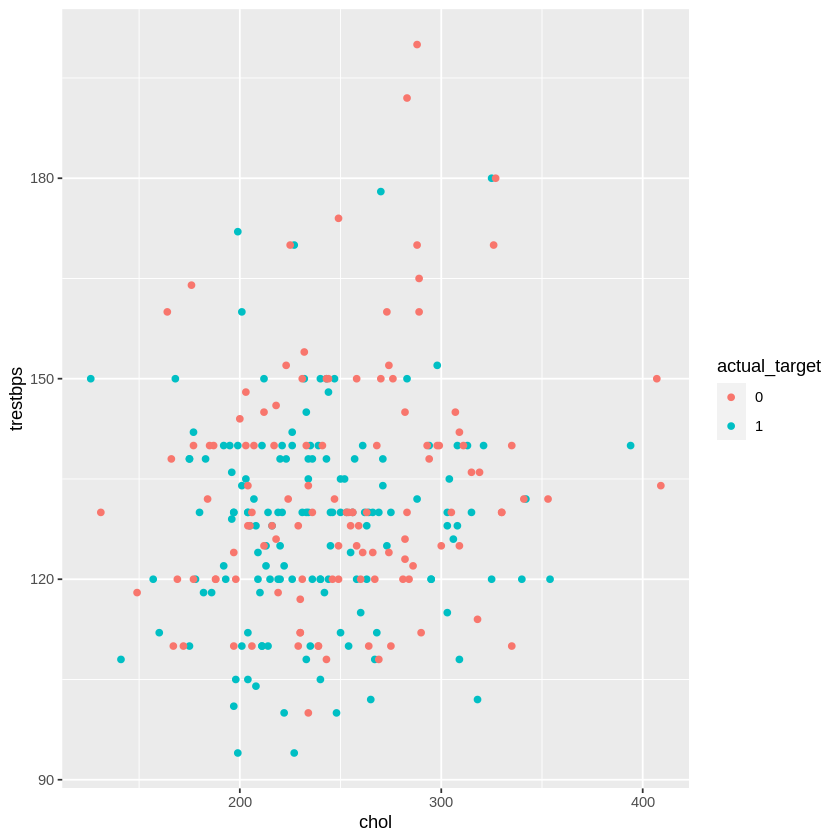

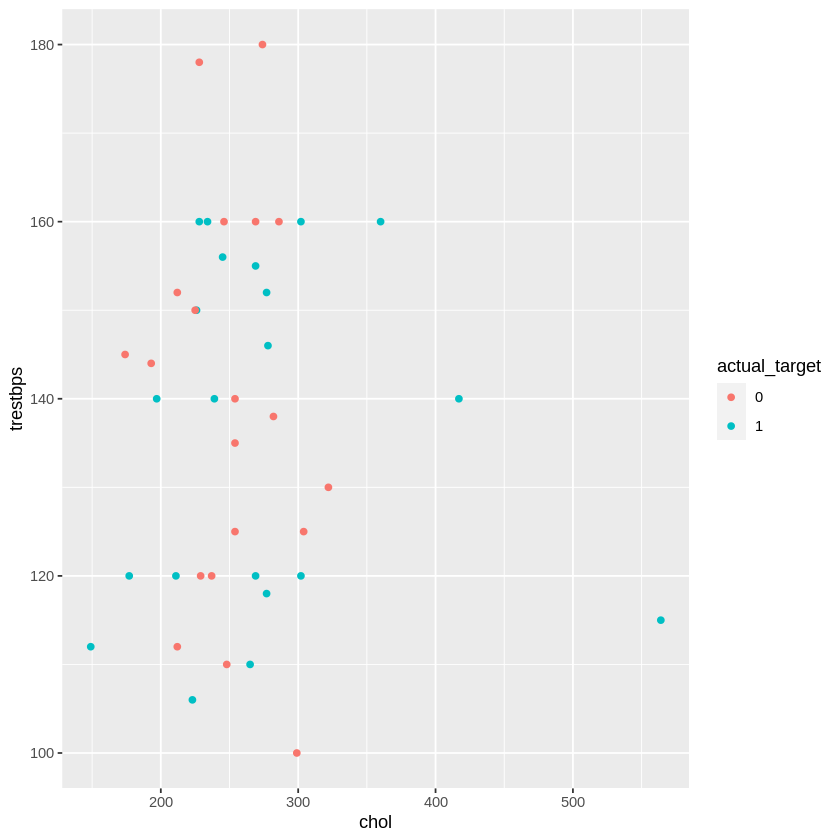

In [11]:
HD_scatter_young <- ggplot(select_data_young, aes(x= chol, y = trestbps,  color = actual_target)) +
              geom_point() +
              xlab("chol") +
              ylab("trestbps")
HD_scatter_young

HD_scatter_old <- ggplot(select_data_old, aes(x= chol, y = trestbps,  color = actual_target)) +
              geom_point() +
              xlab("chol") +
              ylab("trestbps")
HD_scatter_old

# pm_pairs <- select(select_data, temp, RH, wind, area) %>%
#             ggpairs()
# pm_pairs

In [12]:
reci <- recipe(actual_target ~ ., data = select_data_young)
young_recipe <- reci %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  prep()
young_recipe

reci <- recipe(actual_target ~ ., data = select_data_old)
old_recipe <- reci %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors()) %>%
  prep()
old_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 262 data points and no missing data.

Operations:

Scaling for age, trestbps, chol [trained]
Centering for age, trestbps, chol [trained]

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Training data contained 41 data points and no missing data.

Operations:

Scaling for age, trestbps, chol [trained]
Centering for age, trestbps, chol [trained]

In [13]:
scaled_cancer_young <- bake(young_recipe, select_data_young)
scaled_cancer_young

scaled_cancer_old <- bake(old_recipe, select_data_old)
scaled_cancer_old

age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
1.378119,0.84883872,-0.2260339,1
-1.954414,-0.04027007,0.1258553,1
-1.441717,-0.04027007,-0.8263153,1
⋮,⋮,⋮,⋮
-0.9290192,-1.22574845,0.4156463,0
0.6090726,-0.04027007,-2.3373687,0
0.6090726,-0.04027007,-0.1639358,0


age,trestbps,chol,actual_target
<dbl>,<dbl>,<dbl>,<fct>
-0.6567853,0.6008225,-0.5093555,1
0.3789146,0.1139900,-0.3214756,1
1.0693813,1.0876550,0.5890194,1
⋮,⋮,⋮,⋮
-0.3115520,-0.8596749,-0.3503802,0
-0.3115520,0.6981890,-0.7116878,0
0.0336813,0.3087230,-0.9862815,0


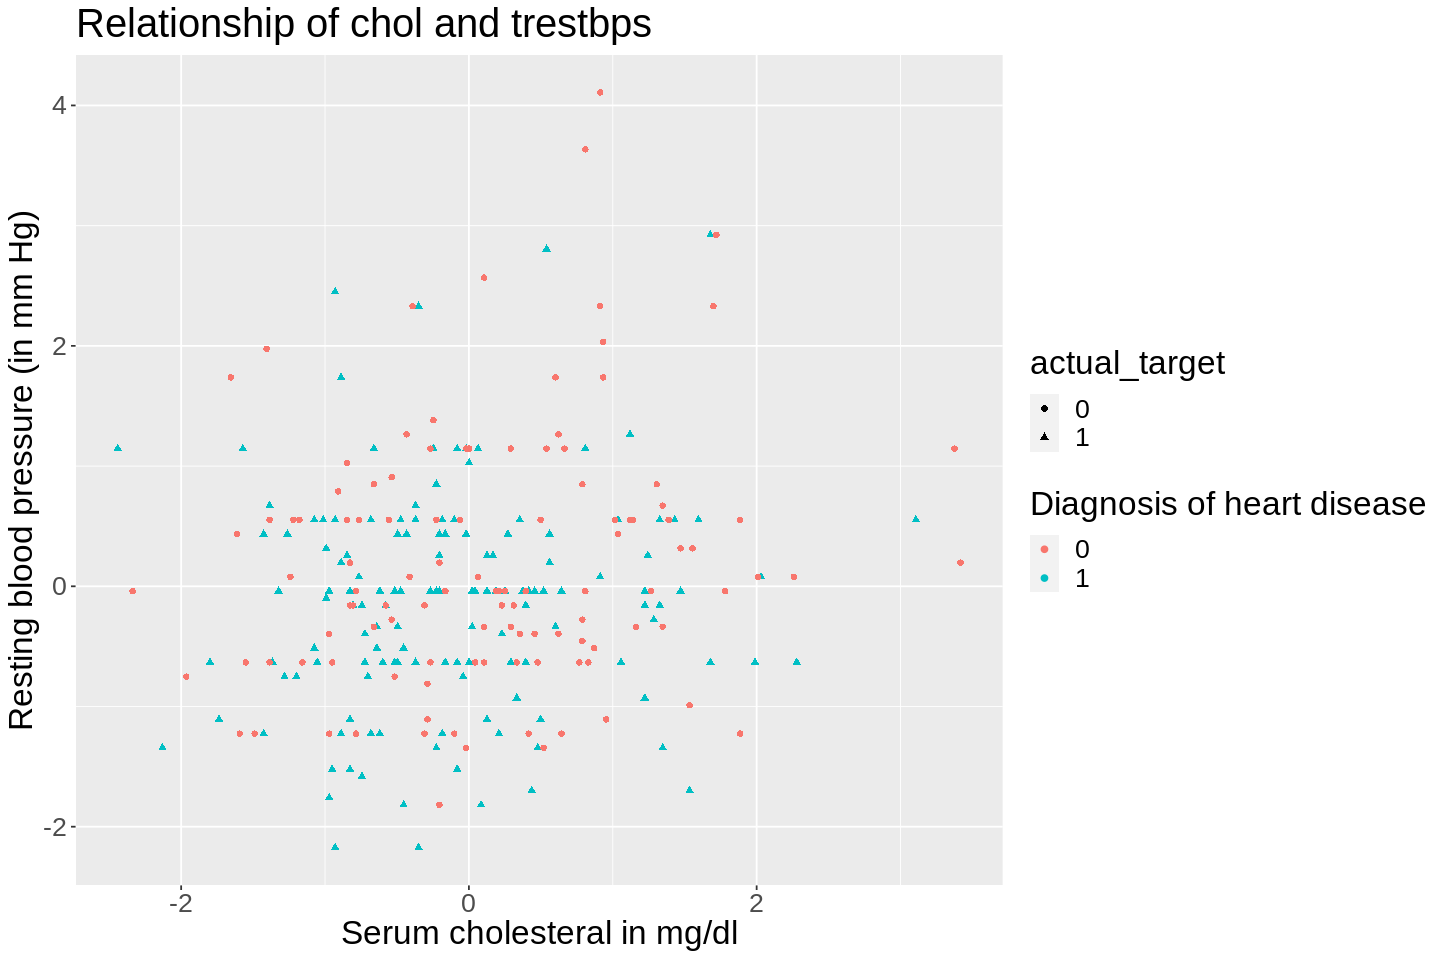

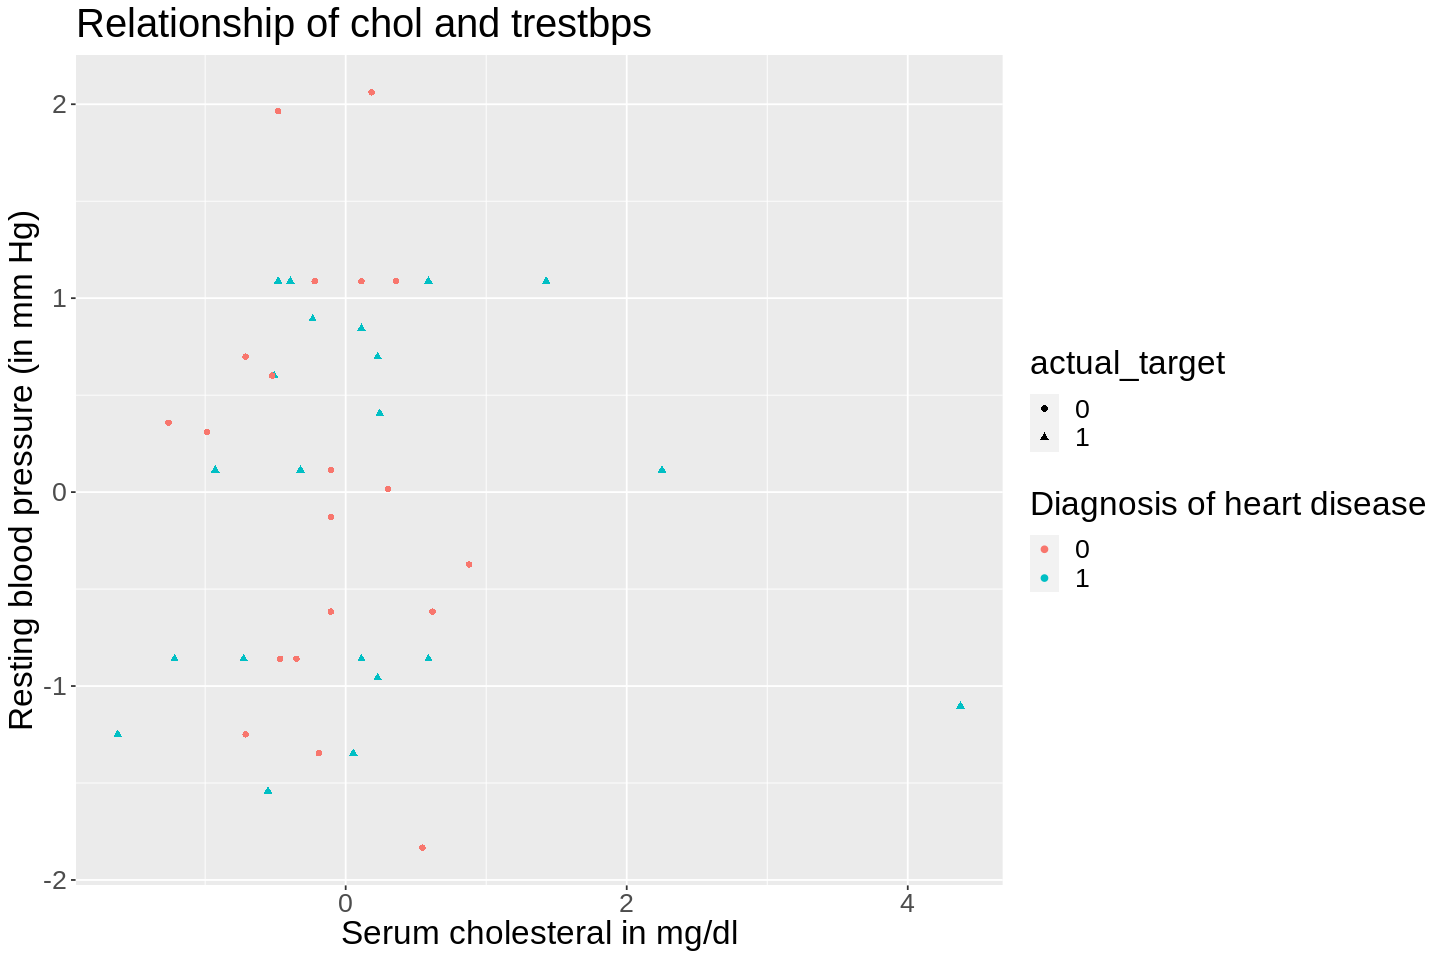

In [14]:
options(repr.plot.width=12, repr.plot.height=8)
HD_scatter_young <- ggplot(scaled_cancer_young, aes(x= chol, y = trestbps,  color = actual_target, shape = actual_target)) +
              geom_point() +
              labs(x = "Serum cholesteral in mg/dl",
                   y = "Resting blood pressure (in mm Hg)",
                   colour = "Diagnosis of heart disease") +
              theme(text = element_text(size=20)) +
              ggtitle("Relationship of chol and trestbps")
HD_scatter_young

HD_scatter_old <- ggplot(scaled_cancer_old, aes(x= chol, y = trestbps,  color = actual_target, shape = actual_target)) +
              geom_point() +
              labs(x = "Serum cholesteral in mg/dl",
                   y = "Resting blood pressure (in mm Hg)",
                   colour = "Diagnosis of heart disease") +
              theme(text = element_text(size=20)) +
              ggtitle("Relationship of chol and trestbps")
HD_scatter_old
# pm_pairs <- select(select_data, chol, trestbps, target) %>%
#             ggpairs()

In [15]:
Heart_disease_split <- initial_split(select_data, prop = 0.75, strata = actual_target)
Heart_disease_training <- training(Heart_disease_split)
Heart_disease_testing <- testing(Heart_disease_split)

In [16]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

In [17]:
Heart_disease_recipe <- recipe(actual_target ~ chol + trestbps, 
                        data = Heart_disease_training) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

In [18]:
Heart_disease_vfold_10 <- vfold_cv(Heart_disease_training, v = 10, strata = actual_target)

In [19]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

In [20]:
knn_fit <- workflow() %>%
           add_recipe(Heart_disease_recipe) %>%
           add_model(knn_spec) %>%
           tune_grid(resamples = Heart_disease_vfold_10, grid = k_vals) %>%
           collect_metrics()
knn_fit

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5174242,10,0.02258090,Model01
1,roc_auc,binary,0.5158916,10,0.02310028,Model01
6,accuracy,binary,0.4905303,10,0.03781666,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
91,roc_auc,binary,0.5706031,10,0.03383681,Model19
96,accuracy,binary,0.5522727,10,0.02171424,Model20
96,roc_auc,binary,0.5788840,10,0.03380838,Model20


In [21]:
accuracies <- knn_fit %>%
  filter(.metric == "accuracy")
accuracies

bestk <- accuracies %>%
         select(mean) %>%
         max()
bestk

bestkk<- accuracies %>% 
         filter(mean > 0.55)
bestkk

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5174242,10,0.02258090,Model01
6,accuracy,binary,0.4905303,10,0.03781666,Model02
11,accuracy,binary,0.5257576,10,0.03002715,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.5564394,10,0.03151739,Model18
91,accuracy,binary,0.5348485,10,0.02208550,Model19
96,accuracy,binary,0.5522727,10,0.02171424,Model20


[1] 0.5916667

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,accuracy,binary,0.5916667,10,0.02390869,Model04
36,accuracy,binary,0.5609848,10,0.03166877,Model08
71,accuracy,binary,0.5696970,10,0.01834244,Model15
81,accuracy,binary,0.5564394,10,0.02978005,Model17
86,accuracy,binary,0.5564394,10,0.03151739,Model18
96,accuracy,binary,0.5522727,10,0.02171424,Model20


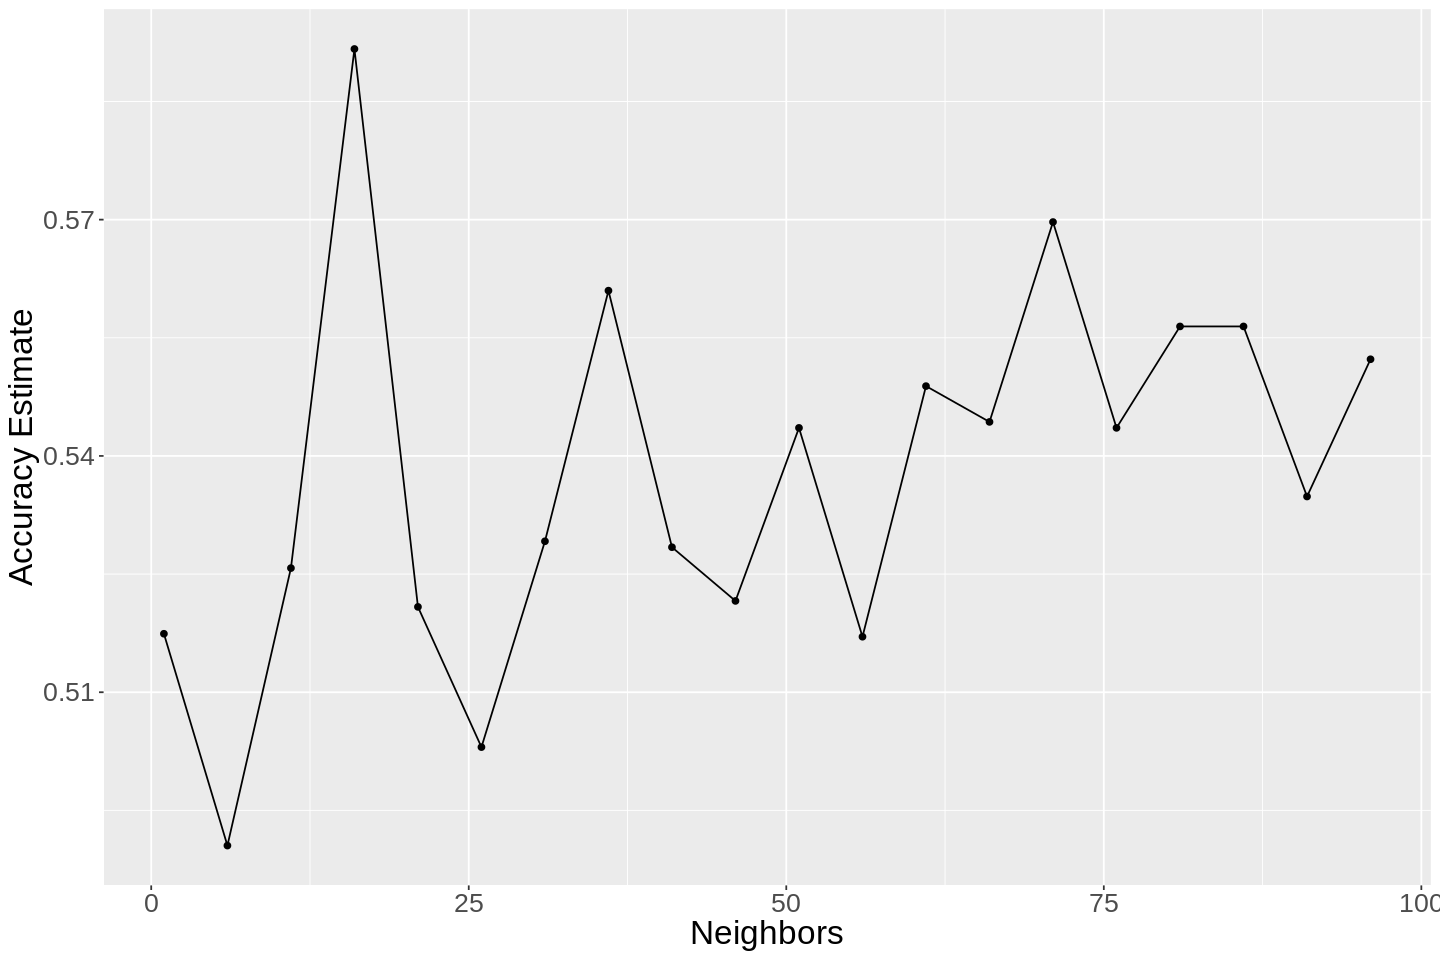

In [22]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 20))

accuracy_vs_k

In [23]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 11) %>%
            set_engine("kknn") %>%
            set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 11
  weight_func = rectangular

Computational engine: kknn 


In [24]:
knn_fit <- workflow() %>%
  add_recipe(Heart_disease_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = Heart_disease_training)
knn_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~11, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4736842
Best kernel: rectangular
Best k: 11

In [25]:
Heart_disesase_test_predictions <- predict(knn_fit, Heart_disease_testing) %>%
  bind_cols(Heart_disease_testing)
Heart_disesase_test_predictions

.pred_class,age,trestbps,chol,actual_target
<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,41,130,204,1
0,57,140,192,1
0,56,140,294,1
⋮,⋮,⋮,⋮,⋮
1,63,124,197,0
1,57,140,241,0
1,57,130,236,0


In [26]:
Heart_disesase_predictions <- Heart_disesase_test_predictions %>%
                              metrics(truth = actual_target, estimate = .pred_class) %>%
                              filter(.metric == "accuracy")
Heart_disesase_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5733333


In [27]:
confusion <- Heart_disesase_test_predictions %>%
             conf_mat(truth = .pred_class, estimate = .pred_class)
confusion

          Truth
Prediction  0  1
         0 30  0
         1  0 45